In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from pathlib import Path

import cv2
import skimage as sk
import skimage.io as skio

%load_ext autoreload
%autoreload 2

In [2]:
from submission import *
from helper import *

In [3]:
corresp = np.load("../data/some_corresp.npz")
pts1 = corresp['pts1']
pts2 = corresp['pts2']
display(pts1.shape, pts2.shape)

(110, 2)

(110, 2)

(640, 480, 3)

(640, 480, 3)

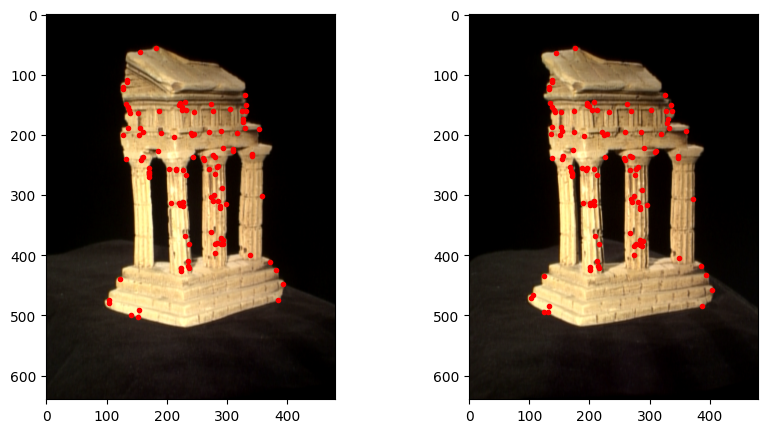

In [4]:
im1 = skio.imread('../data/im1.png')
im2 = skio.imread('../data/im2.png')
display(im1.shape)
display(im2.shape)

ax, fig = plt.subplots(1, 2, figsize=(10, 5))
fig[0].imshow(im1)
fig[1].imshow(im2)

fig[0].plot(pts1[:, 0], pts1[:, 1], 'r.')
fig[1].plot(pts2[:, 0], pts2[:, 1], 'r.')

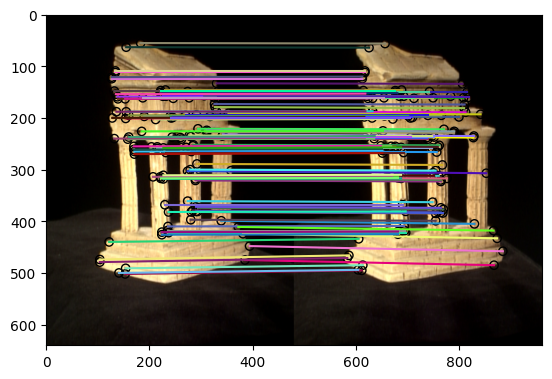

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=1)
sk.feature.plot_matches(ax, im1, im2, pts1[:, ::-1], pts2[:, ::-1], np.column_stack((np.arange(len(pts1)), np.arange(len(pts2)))))

In [6]:
intrinsics = np.load("../data/intrinsics.npz")
K1 = intrinsics['K1']
K2 = intrinsics['K2']

display(K1)
display(K2)

array([[1.5204e+03, 0.0000e+00, 3.0232e+02],
       [0.0000e+00, 1.5259e+03, 2.4687e+02],
       [0.0000e+00, 0.0000e+00, 1.0000e+00]])

array([[1.5204e+03, 0.0000e+00, 3.0232e+02],
       [0.0000e+00, 1.5259e+03, 2.4687e+02],
       [0.0000e+00, 0.0000e+00, 1.0000e+00]])

In [7]:
coords = np.load("../data/temple_coords.npz")
pt1 = coords['pts1']
pt1.shape

(288, 2)

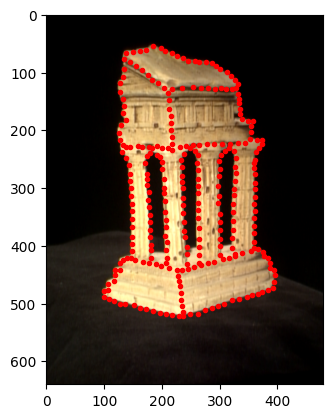

In [8]:
plt.imshow(im1)
plt.plot(pt1[:, 0], pt1[:, 1], 'r.')

In [9]:
F = eight_point(pts1, pts2, max(im1.shape))
F.shape

/Users/aviralgupta/Dev/3d_reconstruction/python/submission.py:30: RuntimeWarning: overflow encountered in scalar multiply
  A[i] = [_x*x, _x*y, _x, _y*x, _y*y, _y, x, y, 1]


(3, 3)

In [10]:
pt2 = epipolar_correspondences(im1, im2, F, pt1)
pt2.shape

/Users/aviralgupta/Dev/3d_reconstruction/python/submission.py:62: RuntimeWarning: invalid value encountered in scalar divide
  return np.sum((patch1 - patch1.mean()) * (patch2 - patch2.mean())) / (patch1.std() * patch2.std())


(288, 2)

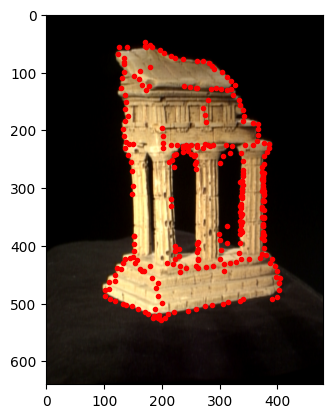

In [11]:
plt.imshow(im2)
plt.plot(pt2[:, 0], pt2[:, 1], 'r.')

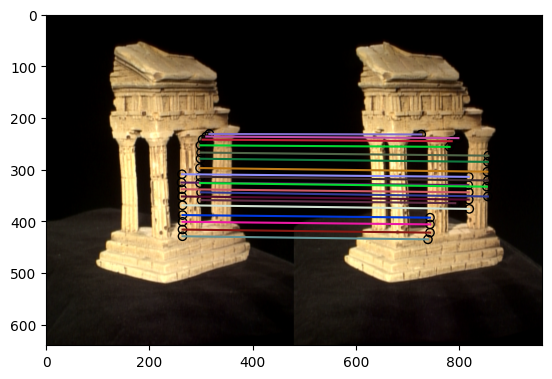

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=1)
start = 250
end = 270
sk.feature.plot_matches(ax, im1, im2, pt1[start:end, ::-1], pt2[start:end, ::-1], np.column_stack((np.arange(end-start), np.arange(end-start))))